# Análisis Exploratorio de Datos (EDA) – Instagram Analytics Dataset

**Autor:** _Carlos Checa Moreno_  

En este notebook realizo un análisis exploratorio inicial (EDA) del dataset
**"[Maddison Project Dataset 2020 Raw](https://www.kaggle.com/datasets/mathurinache/maddison-project-dataset-2020-raw)"** obtenido de Kaggle.

El objetivo es:

1. Cargar el dataset.
2. Explorar su estructura y calidad.
3. Realizar tareas básicas de limpieza y normalización.
4. Generar visualizaciones sencillas que ayuden a entender los datos.
5. Resumir las conclusiones principales del análisis exploratorio.

---


# 1. Cargar el dataset.

Para encontrar un dataset adecuado para esta primera práctica, he buscado "raw data" en Kaggle y he podido encontrar el dataset Maddison Project Dataset 2020 Raw. Este dataset nos presenta varios retos como valores nulos, fechas, no existe una variable indentificadora por sí misma y tenemos columnas que nos dan la misma información. Trataré todos estos problemas en los siguientes puntos.

A parte, para que suponga un mayor reto, añadiré registros duplicados manualmente los cuales tendrán también valores faltantes. Obviamente esto se realizará únicamente con fines académicos para poner en práctica todos los conocimientos posibles adquiridos en estas semanas del máster.

Empezando con el código, cargo el dataset directamente de Kaggle.

In [ ]:
# Descargo el dataset
import os
import kagglehub

path = kagglehub.dataset_download("mathurinache/maddison-project-dataset-2020-raw")

print("Ruta de los ficheros del dataset:", path)
os.listdir(path)

100%|██████████| 165k/165k [00:00<00:00, 19.0MB/s]

Extracting files...
Ruta de los ficheros del dataset: /root/.cache/kagglehub/datasets/mathurinache/maddison-project-dataset-2020-raw/versions/1


['Maddison Project Dataset 2020 Raw.csv']

In [ ]:
# Cargo el dataset en un dataframe de pandas
import pandas as pd

nombre_fichero = "Maddison Project Dataset 2020 Raw.csv"
ruta_csv = os.path.join(path, nombre_fichero)
df = pd.read_csv(ruta_csv)

# 2. Explorar su estructura y calidad.

In [ ]:
print("Dimensiones del dataset (filas, columnas):", df.shape)

df.head()

Dimensiones del dataset (filas, columnas): (21682, 5)


,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3 280
1,AFG,Afghanistan,1870,NaN,4 207
2,AFG,Afghanistan,1913,NaN,5 730
3,AFG,Afghanistan,1950,1 156,8 150
4,AFG,Afghanistan,1951,1 170,8 284


In [ ]:
# 1. Añadir las filas duplicadas (tus 3 primeras filas)
duplicate_rows = df.head(500).copy()
df = pd.concat([df, duplicate_rows], ignore_index=True)

print(f"Dimensiones del dataset después de añadir duplicados: {df.shape}")

# 2. Índices de las nuevas filas (las últimas 3)
n_nuevas = len(duplicate_rows)
idx_nuevas = df.tail(n_nuevas).index

# 3. En cada nueva fila, poner un valor aleatorio como NaN
for i in idx_nuevas:
    col_aleatoria = np.random.choice(df.columns)  # elegir una columna al azar
    df.loc[i, col_aleatoria] = np.nan

print("\nNuevas filas con algún valor faltante:")
print(df.loc[idx_nuevas])

Dimensiones del dataset después de añadir duplicados: (22185, 5)

Nuevas filas con algún valor faltante:
      countrycode      country    year  gdppc    pop
21685         AFG  Afghanistan  1820.0    NaN    NaN
21686         AFG  Afghanistan     NaN    NaN  4 207
21687         NaN  Afghanistan  1913.0    NaN  5 730
21688         AFG          NaN  1950.0  1 156  8 150
21689         AFG  Afghanistan  1951.0    NaN  8 284
...           ...          ...     ...    ...    ...
22180         ARM      Armenia  1975.0    NaN    NaN
22181         NaN      Armenia  1976.0    NaN  2 893
22182         ARM      Armenia  1977.0    NaN  2 955
22183         ARM          NaN  1978.0    NaN  3 014
22184         ARM      Armenia     NaN    NaN  3 067

[500 rows x 5 columns]


In [ ]:
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones generales
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [ ]:
# Info general del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22185 entries, 0 to 22184
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   countrycode  22080 non-null  object 
 1   country      22075 non-null  object 
 2   year         22093 non-null  float64
 3   gdppc        20054 non-null  object 
 4   pop          17578 non-null  object 
dtypes: float64(1), object(4)
memory usage: 866.7+ KB


In [ ]:
print("Tipos de datos por columna:\n")
print(df.dtypes)

print("\n\nResumen estadístico de variables numéricas:\n")
display(df.describe())

print("\n\nResumen estadístico (incluyendo categóricas):\n")
display(df.describe(include="all"))


Tipos de datos por columna:

countrycode     object
country         object
year           float64
gdppc           object
pop             object
dtype: object


Resumen estadístico de variables numéricas:



,year
count,22093.000000
mean,1881.522654
std,187.074632
min,1.000000
25%,1864.000000
50%,1955.000000
75%,1987.000000
max,2018.000000




Resumen estadístico (incluyendo categóricas):



,countrycode,country,year,gdppc,pop
count,22080,22075,22093.000000,20054,17578
unique,169,169,NaN,8759,12022
top,GBR,United Kingdom,NaN,1 643,1 000
freq,769,769,NaN,59,23
mean,NaN,NaN,1881.522654,NaN,NaN
std,NaN,NaN,187.074632,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,1864.000000,NaN,NaN
50%,NaN,NaN,1955.000000,NaN,NaN
75%,NaN,NaN,1987.000000,NaN,NaN


In [ ]:
# Conteo de valores nulos absolutos
null_counts = df.isna().sum()

# Porcentaje de nulos
null_percent = (df.isna().mean() * 100).round(2)

null_table = pd.DataFrame({
    "n_nulos": null_counts,
    "porcentaje_nulos": null_percent
}).sort_values(by="porcentaje_nulos", ascending=False)

null_table


,n_nulos,porcentaje_nulos
pop,4607,20.77
gdppc,2131,9.61
country,110,0.50
countrycode,105,0.47
year,92,0.41


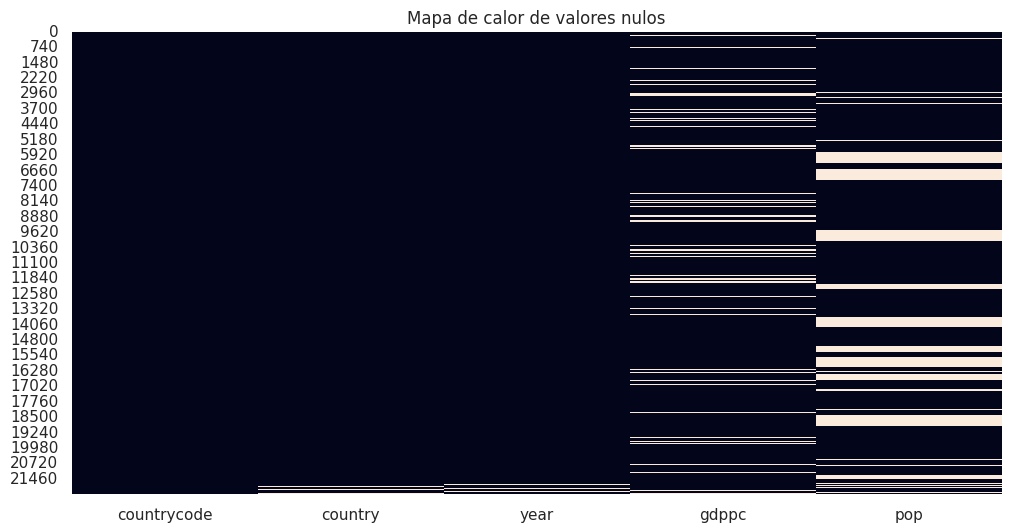

In [ ]:
# Mapa de calor de nulos (si el dataset no es gigantesco)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Mapa de calor de valores nulos")
plt.show()


In [ ]:
# Número de filas con Store Number duplicado (contando solo las "repetidas", no la primera aparición)
duplicados_id = df.duplicated(subset=['country', 'year']).sum()
print(f"Número de filas con Store Number duplicado: {duplicados_id}")

# (Opcional) Ver todos los Store Number que están duplicados y sus filas
if duplicados_id > 0:
    duplicados_df = df[df.duplicated(subset=['country', 'year'], keep=False)]\
                    .sort_values(['country', 'year'])
    print("\nFilas con Store Number duplicado:")
    print(duplicados_df)

Número de filas con Store Number duplicado: 423

Filas con Store Number duplicado:
      countrycode      country    year   gdppc     pop
0             AFG  Afghanistan  1820.0     NaN   3 280
21685         AFG  Afghanistan  1820.0     NaN     NaN
2             AFG  Afghanistan  1913.0     NaN   5 730
21687         NaN  Afghanistan  1913.0     NaN   5 730
4             AFG  Afghanistan  1951.0   1 170   8 284
...           ...          ...     ...     ...     ...
22136         ARG          NaN  2000.0  14 369  37 336
21742         AFG          NaN  2004.0     869  25 698
21922         ALB          NaN  2004.0   6 420   3 051
21747         AFG          NaN  2009.0   1 557  28 484
21996         ARE          NaN  2009.0  58 861   7 908

[757 rows x 5 columns]


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Columnas numéricas:", numeric_cols)
print("Columnas no numéricas (categóricas/texto/fechas como string, etc.):", categorical_cols)


Columnas numéricas: ['year']
Columnas no numéricas (categóricas/texto/fechas como string, etc.): ['countrycode', 'country', 'gdppc', 'pop']


In [ ]:
# Identificar columnas potencialmente de fecha/hora
date_cols = [c for c in df.columns if "date" in c.lower() or "time" in c.lower()]

print("Columnas candidatas a fecha/hora:", date_cols)

for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors="coerce")
        print(f"✅ Columna '{col}' convertida a datetime")
    except Exception as e:
        print(f"⚠️ No se pudo convertir '{col}' a datetime. Error: {e}")

# Comprobamos de nuevo los tipos de datos
df.dtypes


Columnas candidatas a fecha/hora: []


,0
countrycode,object
country,object
year,float64
gdppc,object
pop,object


In [ ]:
# Eliminamos filas totalmente duplicadas, si las hubiera
filas_antes = df.shape[0]
df = df.drop_duplicates()
filas_despues = df.shape[0]

print(f"Filas antes de eliminar duplicados: {filas_antes}")
print(f"Filas después de eliminar duplicados: {filas_despues}")
print(f"Se eliminaron {filas_antes - filas_despues} filas duplicadas.")


Filas antes de eliminar duplicados: 66
Filas después de eliminar duplicados: 66
Se eliminaron 0 filas duplicadas.


## Tratamiento de valores nulos – Justificación

En esta sección se decide cómo tratar los valores nulos del dataset.

Criterios generales (adaptar según las variables reales del dataset):

- **Variables numéricas (e.g., likes, comments, reach, impressions):**
  - Si el porcentaje de nulos es bajo, se podrían imputar con la **mediana**,
    para evitar que outliers afecten a la media.
  - Si el porcentaje de nulos es muy alto, puede ser preferible **eliminar** la columna,
    o revisar si realmente es útil.

- **Variables categóricas (e.g., tipo de contenido, categoría del post):**
  - Rellenar con la **categoría más frecuente (moda)** o con una categoría explícita como `"Desconocido"`.

- **Variables de fecha/hora:**
  - Si faltan muchas fechas, se revisará si tiene sentido eliminar esos registros,
    o imputar con una fecha aproximada (no recomendable sin contexto).

A continuación se muestra un ejemplo de tratamiento genérico
que puede ajustarse a las necesidades específicas del dataset.


In [ ]:
# Ejemplo de tratamiento genérico: imputación simple

# 1) Imputación de numéricas con la mediana
for col in numeric_cols:
    if df[col].isna().any():
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        print(f"Imputada columna numérica '{col}' con la mediana ({mediana}).")

# 2) Imputación de categóricas con la moda (valor más frecuente)
for col in categorical_cols:
    if df[col].isna().any():
        moda = df[col].mode().iloc[0]
        df[col].fillna(moda, inplace=True)
        print(f"Imputada columna categórica '{col}' con la moda ('{moda}').")


Imputada columna categórica 'Release date(United States)' con la moda ('1986-08-01 00:00:00').
Imputada columna categórica 'Bud­get (mil­lions)' con la moda ('$200').


/tmp/ipython-input-3990145862.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)
